# Calc_PDV speedup

After time_profiling the different functions of grid.py, it was found that the main bottleneck was under calc_PDV, more specifically to the call to scipy's spline function, which took up almost more than 50% of the compuation time. We then proceeded to speed up the method by doing the following:

- replacing every instance of the spline evaluation `scipy.interpolate.splev()` with linear interpolation `scipy.interpolate.interp1d()` 
- converting interpolation values to log space

The following notebook was created to measure the results of the changes using the following criteria:
- average speedup
- accuracy

### Importing specific packages

`profile_linear.py` contains the following:
- `run_spline()` for running the original `grid.update()` with spline interpolation
- `run_linear()` for running `grid.update()` with linear interpolation
- `run_linear_log10()` for running `grid.update()` with linear interpolation AND log10 space conversion

The rest of the packages are for statistical plotting and analysis

In [2]:
from profile_linear import *
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn
from scipy.stats import norm


/Users/ethandomingo/Documents/CODING/ZDM/FRB/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


Loading survey: CRACO_std_May2022
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initializing igamma_spline for gamma=-1.01
Initialised grid
Time to normal loop = 0:00:02.448253
Time to normal loop = 0:00:02.285633
Time to normal loop = 0:00:02.282392
Time to normal loop = 0:00:02.327803
Time to normal loop = 0:00:02.314856
Time to normal loop = 0:00:02.270598
Time to normal loop = 0:00:02.269234
Time to normal loop = 0:00:02.349119
Time to normal loop = 0:00:02.295221
Time to normal loop = 0:00:02.320023
0:00:02.316313
Initializing igamma_linear for gamma=-1.01
Time to normal loop = 0:00:01.722815
Time to normal loop = 0:00:01.586218
Time to normal loop = 0:00:01.563783
Time to normal loop = 0:00:01.601894
Time to normal loop = 0:00:01.608206
Time to normal loop = 0:00:01.602565
Time to normal loop = 0:00:01.602405
Time to normal loop = 0:00:01.598291
Time to normal loop = 0:00:01.591059
Time to normal loop = 0:00:01.577664
0:00:01.605490
Initializing igamma_line

## Analayzing the data


### Speed-up

`profile_linear.py` contains the follow time averages defined as `datetime.timedelta`

- `splineAvg` for spline time average 
- `linearAvg` for linear time average
- `linearLogAvg` for linear time w/ logspace conversion time average

In [10]:
print("Spline Time:", splineAvg)
print("Linear Time:", linearAvg)
print("Linear Speed-up:", 1 - (linearAvg/splineAvg), "faster" )
print("Linear Log Time:", linearAvgLog)
print("Linear Log Speed-up:", 1 - (linearAvgLog/splineAvg), "faster")

Spline Time: 0:00:02.316313
Linear Time: 0:00:01.605490
Linear Speed-up: 0.30687692034712066 faster
Linear Log Time: 0:00:01.619982
Linear Log Speed-up: 0.3006204256505921 faster


### Accuracy

Importing the data from `profile_linear.py`, we use the following calculation for relative accuracy:

\begin{align}
\frac{|spline - speedup|}{spline}
\end{align}

In [4]:
splineLinear = relative_acc_array.flatten()
splineLinear.size
splineLinearLog = relative_acc_array2.flatten()
splineLinearLog.size

700000

Plotting both sets of data on a histogram yields the following result

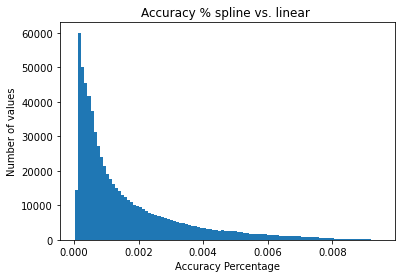

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plot = plt.hist(splineLinear, bins=100)

plt.ylabel("Number of values")
plt.xlabel("Accuracy Percentage")
plt.title("Accuracy % spline vs. linear ")
plt.savefig("Accuracy_spline_linear_.png")


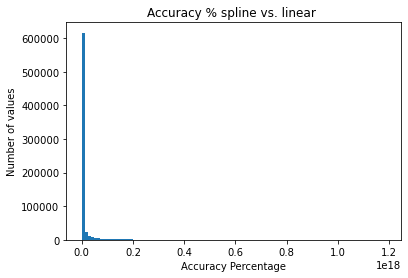

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plot = plt.hist(splineLinearLog, bins=100)

plt.ylabel("Number of values")
plt.xlabel("Accuracy Percentage")
plt.title("Accuracy % spline vs. linear ")
plt.savefig("Accuracy_spline_linear_.png")

And calculating other values with accuracies

In [7]:
mean = statistics.mean(splineLinear)
stdev = statistics.stdev(splineLinear)
median = statistics.median(splineLinear)

print("MEAN:", mean)
print("STDEV:", stdev)
print("MEDIAN:", median)
print("MINIMUM:", min(splineLinear))
print("MAXIMUM:", max(splineLinear))

MEAN: 0.0016211265540896714
STDEV: 0.0016785839647129389
MEDIAN: 0.0009653076914118014
MINIMUM: 3.490627605245515e-05
MAXIMUM: 0.009467970353336382


In [8]:
mean = statistics.mean(splineLinearLog)
stdev = statistics.stdev(splineLinearLog)
median = statistics.median(splineLinearLog)

print("MEAN:", mean)
print("STDEV:", stdev)
print("MEDIAN:", median)
print("MINIMUM:", min(splineLinearLog))
print("MAXIMUM:", max(splineLinearLog))

MEAN: 1.394666222670439e+16
STDEV: 6.415349859877155e+16
MEDIAN: 63373157577686.97
MINIMUM: 33075357.95197776
MAXIMUM: 1.188263749171341e+18


In [9]:
print("spline",frac1)
print("linear",frac2)
print("log", frac3)

spline [[6.55887634e-10 6.55481295e-10 6.55054386e-10 ... 1.17965104e-10
  1.17889475e-10 1.17813941e-10]
 [1.62148028e-10 1.62047384e-10 1.61941645e-10 ... 2.89645869e-11
  2.89458834e-11 2.89272032e-11]
 [7.16162193e-11 7.15716511e-11 7.15248266e-11 ... 1.26759501e-11
  1.26676880e-11 1.26594362e-11]
 ...
 [1.75685180e-15 1.75283264e-15 1.74861618e-15 ... 1.91122948e-20
  1.89682763e-20 1.88253550e-20]
 [1.75085226e-15 1.74684350e-15 1.74263798e-15 ... 1.88214351e-20
  1.86794443e-20 1.85385362e-20]
 [1.74488889e-15 1.74089050e-15 1.73669584e-15 ... 1.85355772e-20
  1.83955811e-20 1.82566530e-20]]
linear [[6.55970961e-10 6.55563661e-10 6.55134816e-10 ... 1.17980118e-10
  1.17903660e-10 1.17827197e-10]
 [1.62169819e-10 1.62069201e-10 1.61963266e-10 ... 2.89686604e-11
  2.89497946e-11 2.89309290e-11]
 [7.16235215e-11 7.15786202e-11 7.15318202e-11 ... 1.26773533e-11
  1.26690943e-11 1.26608347e-11]
 ...
 [1.75786206e-15 1.75383316e-15 1.74959176e-15 ... 1.92778852e-20
  1.91320894e-20 1